In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# NBA data files
league_pergame_path = "Resources/League_PerGame_Year.csv"
team_records_path = "Resources/Team_Records_Per_Year.csv"
nba_team_stats_records_path = "Resources/nba_team_stats&records.csv"
nbapointratios_path = "Resources/nbapointratios.csv"

league_pergame = pd.read_csv(league_pergame_path)
team_records = pd.read_csv(team_records_path)
nba_team_stats_records = pd.read_csv(nba_team_stats_records_path)
nbapointratios = pd.read_csv(nbapointratios_path)


In [11]:
league_pergame_clean = league_pergame.set_index(['Season'])
league_pergame_cleaner = league_pergame_clean.drop(columns = 'Rk')
league_pergame_cleaner.head()

,Lg,Age,Ht,Wt,G,MP,FG,FGA,3P,3PA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
Season,,,,,,,,,,,,,,,,,,,,,
2022-23,NBA,26.2,6-Jun,216.0,705,241.9,41.6,88.2,12.3,34.2,...,114.1,0.472,0.359,0.781,99.3,0.542,12.8,24.2,0.211,114.1
2021-22,NBA,26.1,6-Jun,215.0,1230,241.4,40.6,88.1,12.4,35.2,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2020-21,NBA,26.1,6-Jun,217.0,1080,241.4,41.2,88.4,12.7,34.6,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
2019-20,NBA,26.1,6-Jun,218.0,1059,241.8,40.9,88.8,12.2,34.1,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
2018-19,NBA,26.3,6-Jun,219.0,1230,241.6,41.1,89.2,11.4,32.0,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4


In [12]:
# Grab data for the last 21 years

league_pergame_cleaner = league_pergame_cleaner.iloc[2:23]
newdf_league_pergame = league_pergame_cleaner.sort_values("Season" , ascending = True)
newdf_league_pergame

,Lg,Age,Ht,Wt,G,MP,FG,FGA,3P,3PA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
Season,,,,,,,,,,,,,,,,,,,,,
2000-01,NBA,27.7,7-Jun,216.0,1189,242.0,35.7,80.6,4.8,13.7,...,94.8,0.443,0.354,0.748,91.3,0.473,14.1,28.2,0.231,103.0
2001-02,NBA,27.4,7-Jun,218.0,1189,241.7,36.2,81.3,5.2,14.7,...,95.5,0.445,0.354,0.752,90.7,0.477,13.6,28.9,0.221,104.5
2002-03,NBA,27.2,7-Jun,219.0,1189,242.0,35.7,80.8,5.1,14.7,...,95.1,0.442,0.349,0.758,91.0,0.474,14.0,28.5,0.229,103.6
2003-04,NBA,27.0,7-Jun,220.0,1189,241.7,35.0,79.8,5.2,14.9,...,93.4,0.439,0.347,0.752,90.1,0.471,14.2,28.6,0.228,102.9
2004-05,NBA,26.9,7-Jun,220.0,1230,241.9,35.9,80.3,5.6,15.8,...,97.2,0.447,0.356,0.756,90.9,0.482,13.6,28.7,0.245,106.1
2005-06,NBA,26.5,7-Jun,220.0,1230,242.1,35.8,79.0,5.7,16.0,...,97.0,0.454,0.358,0.745,90.5,0.490,13.7,27.3,0.248,106.2
2006-07,NBA,26.6,7-Jun,219.0,1230,242.2,36.5,79.7,6.1,16.9,...,98.7,0.458,0.358,0.752,91.9,0.496,14.2,27.1,0.246,106.5
2007-08,NBA,26.8,7-Jun,220.0,1230,241.5,37.3,81.5,6.6,18.1,...,99.9,0.457,0.362,0.755,92.4,0.497,13.2,26.7,0.231,107.5
2008-09,NBA,26.6,7-Jun,221.0,1230,241.7,37.1,80.9,6.6,18.1,...,100.0,0.459,0.367,0.771,91.7,0.500,13.3,26.7,0.236,108.3


# Three Point Attempt over Time

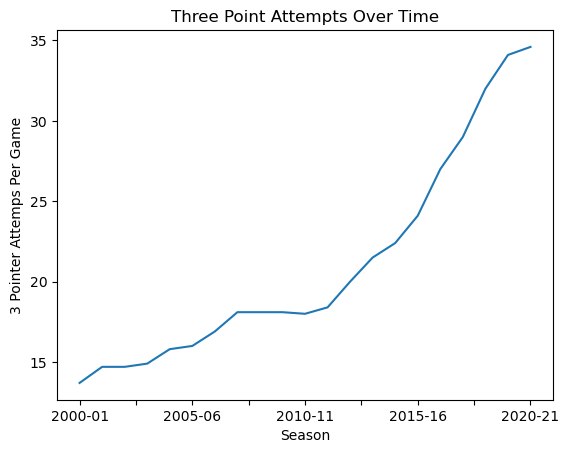

In [14]:
three_point_attempt = newdf_league_pergame['3PA']
three_point_attempt.head()
three_point_attempt.plot(kind = 'line')
plt.ylabel("3 Pointer Attemps Per Game")
plt.title("Three Point Attempts Over Time")
plt.show()

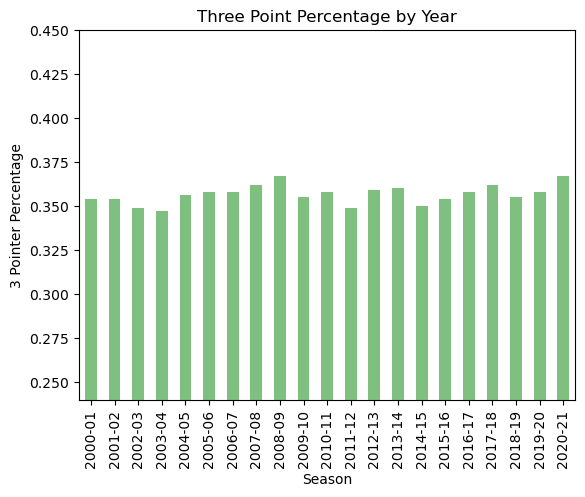

In [15]:
three_point_percent = newdf_league_pergame['3P%']
three_point_percent.head()
plt.ylim(0.24, 0.45)
plt.ylabel("3 Pointer Percentage")
three_point_percent.plot(kind = 'bar', color='g', alpha=0.5, align="center")
plt.title('Three Point Percentage by Year')
plt.show()

# Three point percentage and Win Rate

In [26]:
nba_team_stats_records=nba_team_stats_records.dropna(how='all')

nba_team_stats_records['End']=nba_team_stats_records['Year'].str.split('-').str[1].astype(int)
nba_team_stats_records.head()

,Year,PF_Rank,Team,Year&Team,G,MP,FG,FGA,FG%,3P,...,STL,BLK,TOV,PF,PTS,W,L,W/L%,Playoffs,End
0,2022-23,10.0,Atlanta Hawks,2022-23_Atlanta Hawks,47.0,242.7,43.8,92.0,0.476,10.6,...,7.0,5.0,12.9,19.3,116.0,24.0,23.0,0.511,NaN,23
1,2022-23,2.0,Boston Celtics,2022-23_Boston Celtics,47.0,242.7,42.1,88.7,0.475,15.5,...,6.5,5.4,13.4,18.7,118.5,35.0,12.0,0.745,NaN,23
2,2022-23,16.0,Brooklyn Nets,2022-23_Brooklyn Nets,46.0,240.5,42.7,84.0,0.508,12.1,...,7.1,7.0,14.6,21.9,113.7,29.0,17.0,0.630,NaN,23
3,2022-23,21.0,Charlotte Hornets,2022-23_Charlotte Hornets,47.0,243.2,42.0,92.7,0.453,11.1,...,7.9,4.9,13.6,21.1,112.6,13.0,34.0,0.277,NaN,23
4,2022-23,13.0,Chicago Bulls,2022-23_Chicago Bulls,45.0,242.8,42.8,87.5,0.489,10.8,...,7.6,4.7,13.7,19.7,114.8,21.0,24.0,0.467,NaN,23


In [68]:
# Create a dictionary to hold r values per year for correlation between 'W/L%', '3P%'

min_year=nba_team_stats_records['End'].min()
max_year=nba_team_stats_records['End'].max()
time_dict={}
for year in range(int(min_year), int(max_year)): 
    small_df=nba_team_stats_records.loc[nba_team_stats_records['End']==year]
    small_df=small_df[['3P%', 'W/L%']].dropna()
    corr=small_df.corr()['W/L%']['3P%']
    time_dict[year]=corr
    
time_dict

{1: 0.47872798018529844,
 2: 0.42725712172254754,
 3: 0.4969430726225025,
 4: 0.30469655127536327,
 5: 0.5478600424162122,
 6: 0.27267894316537217,
 7: 0.4209257853160871,
 8: 0.536075016357823,
 9: 0.48253585278306804,
 10: 0.5321527270149237,
 11: 0.42124785363031825,
 12: 0.5716614747304452,
 13: 0.5317349062119539,
 14: 0.5331950522966438,
 15: 0.6939323265372446,
 16: 0.6422669043537109,
 17: 0.6364764350342258,
 18: 0.4375968369709659,
 19: 0.5415944985759195,
 20: 0.44589151481677397,
 21: 0.7868537416483768,
 22: 0.6927959772142583}

Text(0, 0.5, 'R Value')

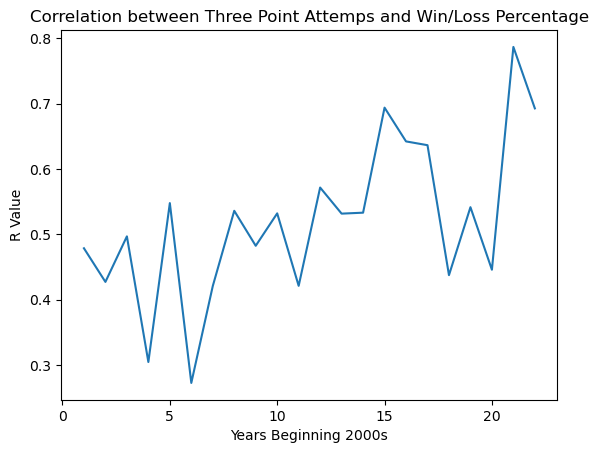

In [69]:
# Plot correlation between 'W/L%', '3P%'
plt.plot(time_dict.keys(), time_dict.values())
plt.title('Correlation between Three Point Attemps and Win/Loss Percentage')
plt.xlabel('Years Beginning 2000s')
plt.ylabel('R Value')

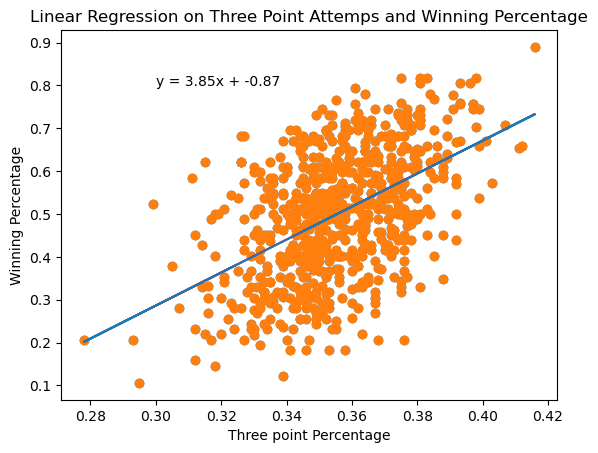

the r value is 0.4946520764122781


In [70]:
# Linear Regression on 'W/L%', '3P%'

x = nba_team_stats_records['3P%']
y = nba_team_stats_records['W/L%']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")

plt.scatter(x,y)
plt.plot(x,regress_values)
plt.title('Linear Regression on Three Point Attemps and Winning Percentage')
plt.xlabel('Three point Percentage')
plt.ylabel('Winning Percentage')
plt.annotate(f'{line_eq}', (0.3,0.8))
plt.show()
print(f'the r value is {rvalue}')

# Three point percentage and Finals Winners

In [65]:
nba_team_stats_records["Playoffs"] = nba_team_stats_records["Playoffs"].fillna(0)
nba_team_stats_records = nba_team_stats_records.dropna()
nba_team_stats_records.head()

,Year,PF_Rank,Team,Year&Team,G,MP,FG,FGA,FG%,3P,...,STL,BLK,TOV,PF,PTS,W,L,W/L%,Playoffs,End
0,2022-23,10.0,Atlanta Hawks,2022-23_Atlanta Hawks,47.0,242.7,43.8,92.0,0.476,10.6,...,7.0,5.0,12.9,19.3,116.0,24.0,23.0,0.511,0,23
1,2022-23,2.0,Boston Celtics,2022-23_Boston Celtics,47.0,242.7,42.1,88.7,0.475,15.5,...,6.5,5.4,13.4,18.7,118.5,35.0,12.0,0.745,0,23
2,2022-23,16.0,Brooklyn Nets,2022-23_Brooklyn Nets,46.0,240.5,42.7,84.0,0.508,12.1,...,7.1,7.0,14.6,21.9,113.7,29.0,17.0,0.630,0,23
3,2022-23,21.0,Charlotte Hornets,2022-23_Charlotte Hornets,47.0,243.2,42.0,92.7,0.453,11.1,...,7.9,4.9,13.6,21.1,112.6,13.0,34.0,0.277,0,23
4,2022-23,13.0,Chicago Bulls,2022-23_Chicago Bulls,45.0,242.8,42.8,87.5,0.489,10.8,...,7.6,4.7,13.7,19.7,114.8,21.0,24.0,0.467,0,23


In [75]:
# Winners '3P%'
won_finals = nba_team_stats_records.loc[nba_team_stats_records["Year"]!= "2022-23"]
won_finals = won_finals.loc[won_finals["Playoffs"] == "Won Finals"]

three_point_percent_winners = won_finals['3P%']
year_winners = won_finals['Year']

# Losers '3P%'
lose_finals = nba_team_stats_records.loc[nba_team_stats_records["Year"]!= "2022-23"]
lose_finals = lose_finals.loc[lose_finals["Playoffs"] != "Won Finals"]

# using loop to checkout how much row of datas each year have
count = 1
count_list = []
year_list = []
year = ""
p3 = 0
for i in lose_finals['Year']:
    if i != year :
        year = i
        count_list.append(count)
        count = 1
        year_list.append(year)
    else :
        count += 1
    
  
print(count_list)         


count_2021 = len(lose_finals.loc[lose_finals['Year']== "2021-22"])
count_list[0] = count_2021
print(count_list)

lose_finals['3P%'].head()

# Using loop to to list the average 3P% of losers

#a = lose_finals["3P%"][0: 29].mean()
                  # i  i + 29 -1 + 1
#b = lose_finals["3P%"][29: 58].mean()
#lose_finals["3P%"][60: 89]
# # Using loop for calculate each year losers 3 point percentage (2000-1 to 2021-22)
avg_list = []
count = 0
for i in count_list:
                            #   0      0+29 = 29, count = 29
                            #   29     29+29
                            #   58     58+29
    avg_3 = lose_finals["3P%"][count : count+i].mean()
    avg_list.append(avg_3)
    count += i 
print(avg_list)

[1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28]
[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28]
[0.3532068965517241, 0.3652413793103448, 0.35806896551724143, 0.35513793103448266, 0.3607241379310345, 0.3562758620689655, 0.35244827586206895, 0.3474137931034483, 0.35744827586206895, 0.3562413793103448, 0.34682758620689663, 0.3559655172413794, 0.3531724137931035, 0.36558620689655175, 0.3595172413793104, 0.3559655172413793, 0.3572758620689655, 0.3528275862068965, 0.3457931034482758, 0.3464285714285714, 0.35178571428571426, 0.351925925925926]


In [76]:
# put into DataFrame
lost_finals_year_avg = pd.DataFrame({"Year":year_list, "3P%": avg_list})
lost_finals_year_avg.head()

,Year,3P%
0,2021-22,0.353207
1,2020-21,0.365241
2,2019-20,0.358069
3,2018-19,0.355138
4,2017-18,0.360724


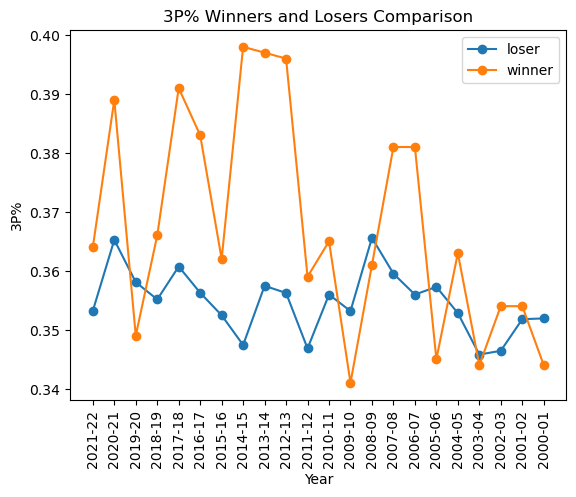

In [78]:
# making multipule lines plot to compare 
plt.plot(year_list, avg_list,marker = 'o', label="loser" )
plt.plot(year_list, three_point_percent_winners,marker = 'o', label="winner" )
plt.xticks(rotation = 90)
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("3P%")
plt.title("3P% Winners and Losers Comparison")
plt.show()

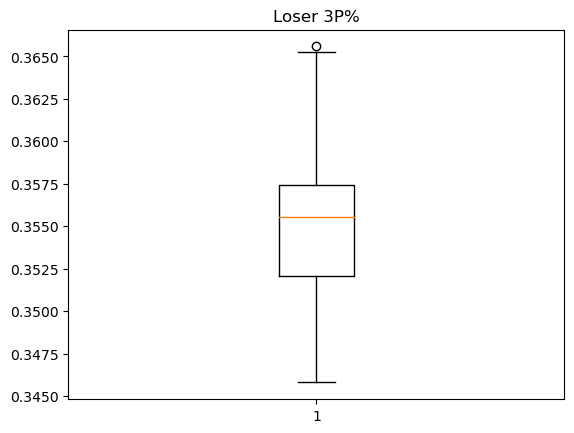

The lower quartile of 3P% is: 0.3520565134099617
The upper quartile of 3P% is: 0.3574051724137931
The interquartile range of 3P% is: 0.005348659003831413
The the median of 3P% is: 0.355551724137931 
Values below 0.34 could be outliers.
Values above 0.37 could be outliers.


In [53]:
# loser Boxplot
plt.boxplot(lost_finals_year_avg['3P%'], showfliers=True)
plt.title("Loser 3P%")
plt.show()
quartiles = lost_finals_year_avg['3P%'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of 3P% is: {lowerq}")
print(f"The upper quartile of 3P% is: {upperq}")
print(f"The interquartile range of 3P% is: {iqr}")
print(f"The the median of 3P% is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound, 2)} could be outliers.")
print(f"Values above {round(upper_bound, 2)} could be outliers.")

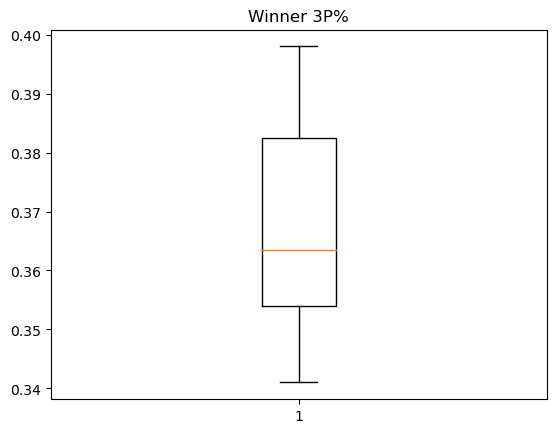

The lower quartile of 3P% is: 0.354
The upper quartile of 3P% is: 0.3825
The interquartile range of 3P% is: 0.028500000000000025
The the median of 3P% is: 0.3635 
Values below 0.31 could be outliers.
Values above 0.43 could be outliers.


In [67]:
# Winner Boxplot
plt.boxplot(three_point_percent_winners, showfliers = True)
plt.title("Winner 3P%")
plt.show()
quartiles = three_point_percent_winners.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of 3P% is: {lowerq}")
print(f"The upper quartile of 3P% is: {upperq}")
print(f"The interquartile range of 3P% is: {iqr}")
print(f"The the median of 3P% is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound, 2)} could be outliers.")
print(f"Values above {round(upper_bound, 2)} could be outliers.")

# Percentage of Total Points Scored by Three Pointers

In [55]:
nbapointratios.head()

,Season,3PPoints,FT,2PPoints,PTS
0,2022-23,36.9,18.6,58.6,114.1
1,2021-22,37.2,16.9,56.5,110.6
2,2020-21,38.1,17.0,57.0,112.1
3,2019-20,36.6,17.9,57.3,111.8
4,2018-19,34.2,17.7,59.3,111.2


In [57]:
nbapointratios["3P%"] = nbapointratios['3PPoints'] / nbapointratios['PTS']
nbapointratios["Others%"] = 1 - nbapointratios["3P%"]
nbapointratios

,Season,3PPoints,FT,2PPoints,PTS,3P%,Others%
0,2022-23,36.9,18.6,58.6,114.1,0.323401,0.676599
1,2021-22,37.2,16.9,56.5,110.6,0.336347,0.663653
2,2020-21,38.1,17.0,57.0,112.1,0.339875,0.660125
3,2019-20,36.6,17.9,57.3,111.8,0.327370,0.672630
4,2018-19,34.2,17.7,59.3,111.2,0.307554,0.692446
...,...,...,...,...,...,...,...
72,1950-51,0.0,24.5,59.6,84.1,0.000000,1.000000
73,1949-50,0.0,23.6,56.4,80.0,0.000000,1.000000
74,1948-49,0.0,22.0,58.0,80.0,0.000000,1.000000
75,1947-48,0.0,18.2,54.5,72.7,0.000000,1.000000


In [58]:
# generate a list of 3p% average by each decade
nbapointratios.head(30)
nbapointratios_20s = nbapointratios.iloc[0:3,]
nbapointratios_20s
p3_20 = round(nbapointratios_20s['3P%'].mean(), 2)
p_other_20 = round(nbapointratios_20s["Others%"].mean(), 2)
count = 1
p3 = 0
p_other = 0
p3_list = [p3_20]
p_other_list = [p_other_20]
for i in range(3, 43) :
    if count != 10 :
        p3 += nbapointratios["3P%"][i]
        p_other += nbapointratios["Others%"][i]
        count += 1
    else:
        
        p3 += nbapointratios["3P%"][i]
        p_other += nbapointratios["Others%"][i]
        p3_list.append(round(p3/10, 2))
        p_other_list.append(round(p_other/10, 2))
        
        
        count = 1
        p3 = 0
        p_other = 0

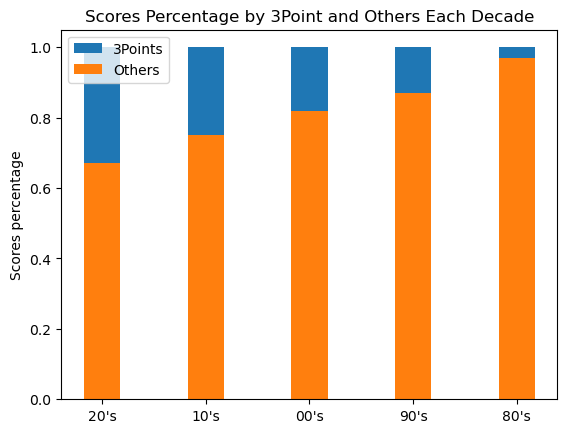

<Figure size 1600x1500 with 0 Axes>

In [59]:
labels = ["20's", "10's", "00's", "90's", "80's"]

width = 0.35
fig, ax = plt.subplots()

ax.bar(labels, p3_list, width, label='3Points',bottom=p_other_list,)
ax.bar(labels, p_other_list, width, 
       label='Others')

ax.set_ylabel('Scores percentage')
ax.set_title('Scores Percentage by 3Point and Others Each Decade')
ax.legend(loc="best")
f = plt.figure(figsize = (16, 15))
plt.show()